In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from matplotlib import pylab
from pylab import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('/Users/munjismac/code/munjik/personal-projects/warren-buffet/Company Data - Data.csv')

In [3]:
df.head(10)

,symbol,calendarYear,GPM,A (SGA),B (RD),C (PPE),D (DEPR),E (CAPEX),F (NR),currentRatio,G (ROA),H (LD/GP),debtToEquity,Net Issuance,Interest - income,Buy =1
0,AAPL,2021,0.417794,0.143768,0.143382,0.258054,0.073831,-0.117079,0.544001,1.074553,0.269742,0.713876,1.729371,-1.479404,0.024277,1
1,AAPL,2020,0.382332,0.189756,0.178665,0.350299,0.105339,-0.127310,0.652227,1.363604,0.177256,0.940080,1.510078,-1.407629,0.043341,1
2,AAPL,2019,0.378178,0.185432,0.164820,0.379889,0.127521,-0.189934,0.828942,1.540126,0.163230,0.933074,1.014577,-1.463585,0.055936,1
3,AAPL,2018,0.383437,0.164033,0.139789,0.405581,0.107061,-0.223631,0.823017,1.123843,0.162775,0.920423,0.874826,-1.792717,0.045699,1
4,AAPL,2017,0.384699,0.173055,0.131325,0.383088,0.115177,-0.264627,0.737792,1.276063,0.128826,1.102295,0.725171,-0.901804,0.037868,1
5,AAPL,2016,0.390760,0.168449,0.119210,0.320544,0.124669,-0.296539,0.641298,1.352669,0.142024,0.895138,0.588129,-0.935234,0.024257,1
6,AAPL,2015,0.400599,0.153045,0.086162,0.240008,0.120234,-0.215155,0.568285,1.108771,0.183814,0.571027,0.447933,-1.266049,0.010291,1
7,AAPL,2014,0.385880,0.170024,0.085643,0.292386,0.112650,-0.248368,0.688914,1.080113,0.170420,0.410947,0.259864,-1.898941,0.007314,1
8,AAPL,2013,0.376245,0.168419,0.069591,0.258102,0.105079,-0.245052,0.557308,1.678639,0.178923,0.263747,0.137273,-1.129832,0.002776,1
9,AAPL,2012,0.438712,0.146224,0.049241,0.225044,0.047727,-0.225289,0.447895,1.495849,0.237033,0.000000,0.000000,0.040494,0.000000,1


In [4]:
df.shape

(1005, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbol             1005 non-null   object 
 1   calendarYear       1005 non-null   int64  
 2   GPM                1005 non-null   float64
 3   A (SGA)            1005 non-null   float64
 4   B (RD)             1005 non-null   float64
 5   C (PPE)            1005 non-null   float64
 6   D (DEPR)           1005 non-null   float64
 7   E (CAPEX)          1005 non-null   float64
 8   F (NR)             1005 non-null   float64
 9   currentRatio       1001 non-null   float64
 10  G (ROA)            1005 non-null   float64
 11  H (LD/GP)          1005 non-null   float64
 12  debtToEquity       1005 non-null   float64
 13  Net Issuance       1005 non-null   float64
 14  Interest - income  1005 non-null   float64
 15  Buy =1             1005 non-null   int64  
dtypes: float64(13), int64(2)

<h3>Missing Data </h3>

In [6]:
print(df.isnull().sum())
# after running the above we see that currentRatio has 4 missing values. Let's examine

symbol               0
calendarYear         0
GPM                  0
A (SGA)              0
B (RD)               0
C (PPE)              0
D (DEPR)             0
E (CAPEX)            0
F (NR)               0
currentRatio         4
G (ROA)              0
H (LD/GP)            0
debtToEquity         0
Net Issuance         0
Interest - income    0
Buy =1               0
dtype: int64


<h3>Checking for Duplicates </h3>

In [7]:
#  Check whether a row is a duplicated version of a previous row
df.duplicated().sum()

0

<p>We found 4 missing values: <b> Less than 30% of values missing: impute a value that makes sense e.g. Median, mean, mode.</b>
 </p>

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imputer = SimpleImputer(strategy="mean") # Instanciate a SimpleImputer object with strategy of choice
imputer.fit(df[['currentRatio']]) # Call the "fit" method on the object
df['currentRatio'] = imputer.transform(df[['currentRatio']]) # Call the "transform" method on the object
imputer.statistics_ # The mean is stored in the transformer's memory

array([1.43231917])

<h2>Let's examine each feature and their Dtype </h2>
<h3>Let's change CalendarYear to a date time series</h3>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbol             1005 non-null   object 
 1   calendarYear       1005 non-null   int64  
 2   GPM                1005 non-null   float64
 3   A (SGA)            1005 non-null   float64
 4   B (RD)             1005 non-null   float64
 5   C (PPE)            1005 non-null   float64
 6   D (DEPR)           1005 non-null   float64
 7   E (CAPEX)          1005 non-null   float64
 8   F (NR)             1005 non-null   float64
 9   currentRatio       1005 non-null   float64
 10  G (ROA)            1005 non-null   float64
 11  H (LD/GP)          1005 non-null   float64
 12  debtToEquity       1005 non-null   float64
 13  Net Issuance       1005 non-null   float64
 14  Interest - income  1005 non-null   float64
 15  Buy =1             1005 non-null   int64  
dtypes: float64(13), int64(2)

In [11]:
df['calendarYear'] = pd.to_datetime(df['calendarYear'], format='%Y')
df['calendarYear'] = df['calendarYear'].dt.year

<h2>Feature scaling is essential for machine learning algorithms that calculate distances between data. </h2>

In [12]:
df = df.drop(columns='calendarYear')

array([[<AxesSubplot:title={'center':'GPM'}>,
        <AxesSubplot:title={'center':'A (SGA)'}>,
        <AxesSubplot:title={'center':'B (RD)'}>,
        <AxesSubplot:title={'center':'C (PPE)'}>],
       [<AxesSubplot:title={'center':'D (DEPR)'}>,
        <AxesSubplot:title={'center':'E (CAPEX)'}>,
        <AxesSubplot:title={'center':'F (NR)'}>,
        <AxesSubplot:title={'center':'currentRatio'}>],
       [<AxesSubplot:title={'center':'G (ROA)'}>,
        <AxesSubplot:title={'center':'H (LD/GP)'}>,
        <AxesSubplot:title={'center':'debtToEquity'}>,
        <AxesSubplot:title={'center':'Net Issuance'}>],
       [<AxesSubplot:title={'center':'Interest - income'}>,
        <AxesSubplot:title={'center':'Buy =1'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

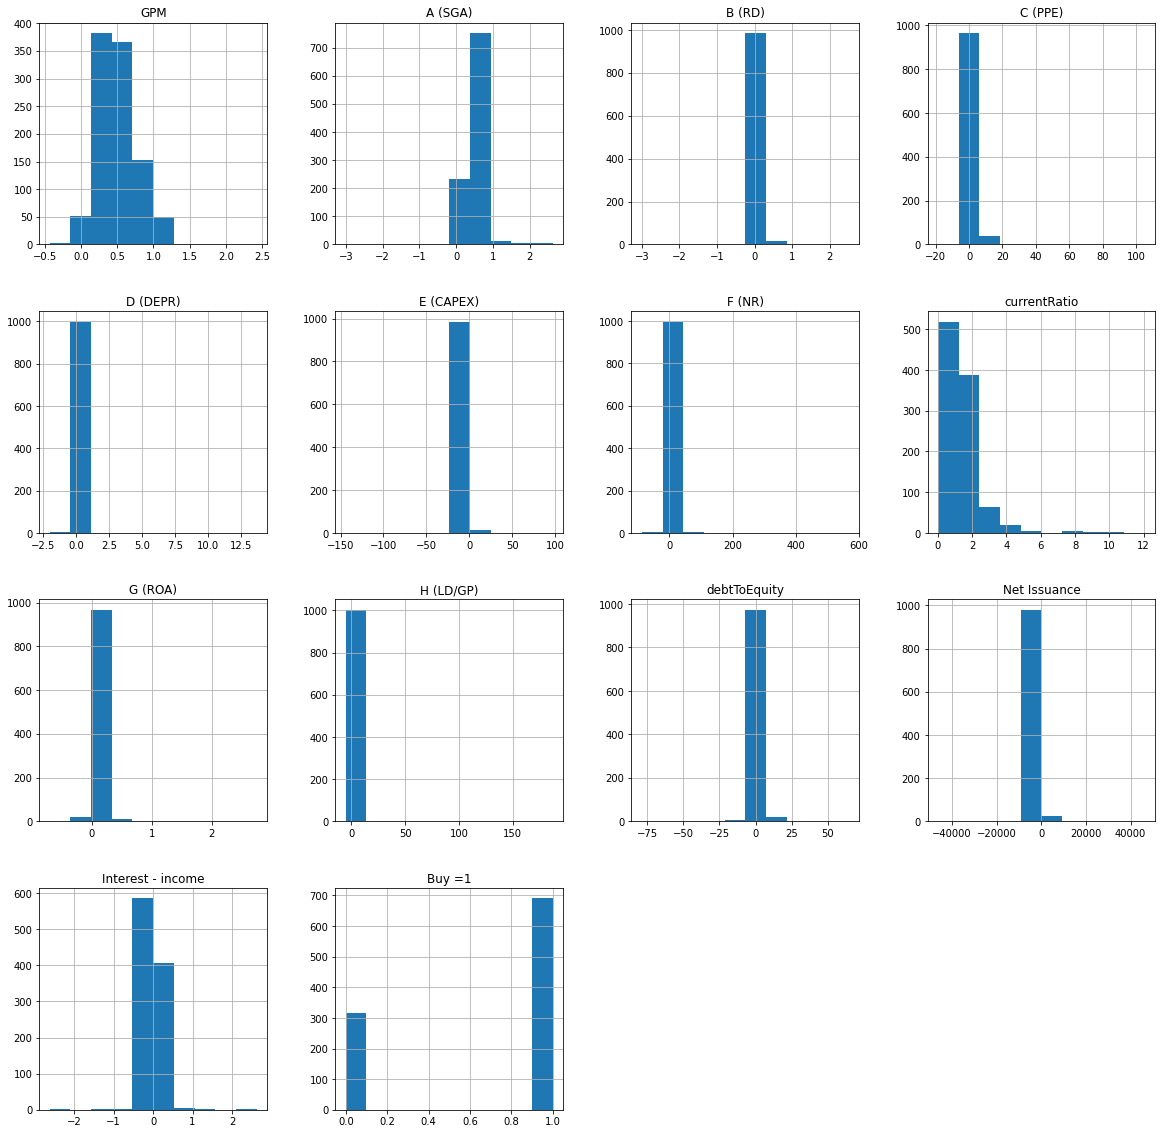

In [13]:
df.hist(figsize=(20,20))

In [14]:
#function to return plots for the feature to see normal distribution
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

<b>A (SGA)</b>

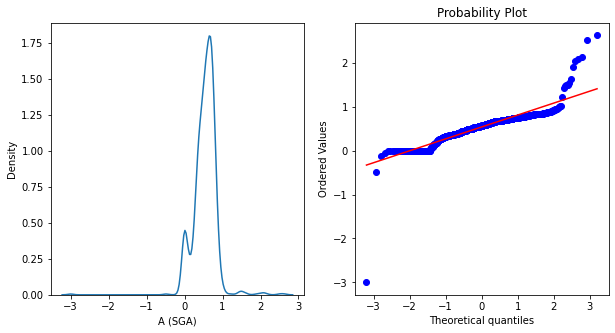

In [15]:
normality(df,'A (SGA)') 
#from the graphs I conclude this is normal distribution will use Robust

In [16]:
columns_name = []
# for each column in the dataframe
for (columnName, columnData) in df.iteritems():
    columns_name.append(columnName)

In [17]:
columns_name.remove('symbol')
columns_name

['GPM',
 'A (SGA)',
 'B (RD)',
 'C (PPE)',
 'D (DEPR)',
 'E (CAPEX)',
 'F (NR)',
 'currentRatio',
 'G (ROA)',
 'H (LD/GP)',
 'debtToEquity',
 'Net Issuance',
 'Interest - income',
 'Buy =1']

<p>GPM</p>

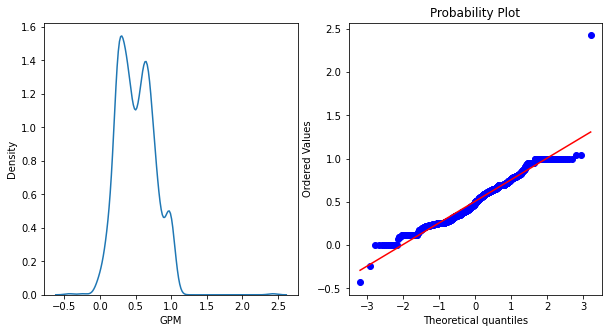

In [18]:
normality(df,columns_name[0]) #robust scaler

<b>B (RD) </b>

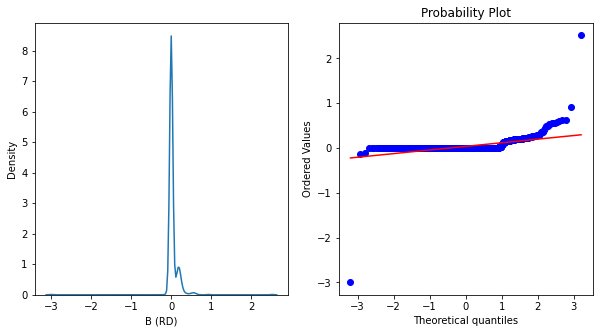

In [19]:
normality(df,columns_name[2]) #robust scaler

<b>'C (PPE)'</b>

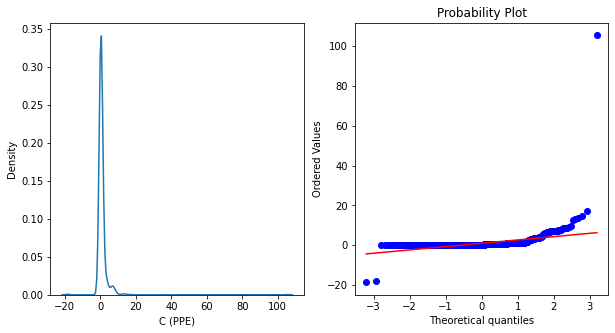

In [20]:
normality(df,columns_name[3]) #robust

<b> 'D (DEPR)' </b>

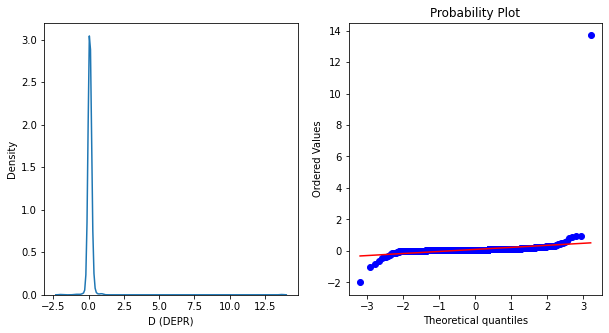

In [21]:
normality(df,columns_name[4]) #robust

<b>  'E (CAPEX)'</b>

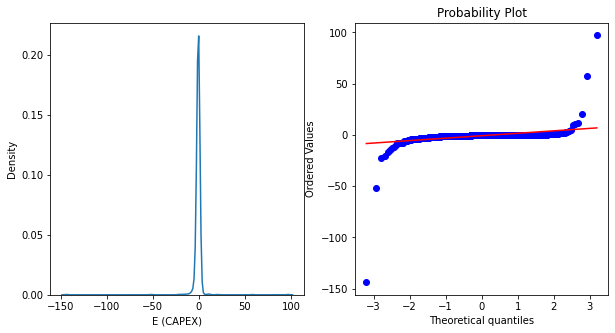

In [22]:
normality(df,columns_name[5]) #robust

<b> 'F (NR)'</b>

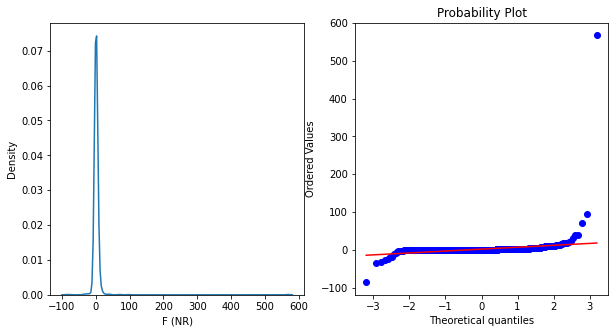

In [23]:
normality(df,columns_name[6]) #robust

<b> currentRatio</b>

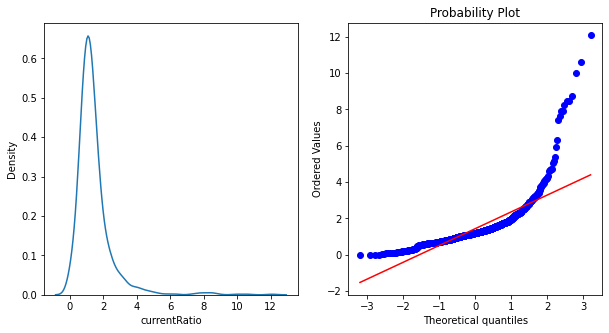

In [24]:
normality(df,columns_name[7]) #min max???

In [25]:
# 'G (ROA)',
#  'H (LD/GP)',
#  'debtToEquity',
#  'Net Issuance',
#  'Interest - income',
#  'Buy =1']

<b> G (ROA)</b>

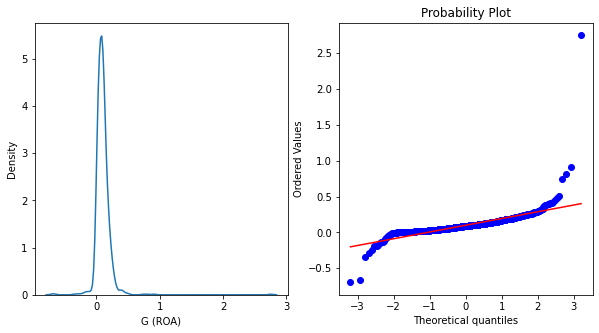

In [26]:
normality(df,columns_name[8]) #robust

<b>H (LD/GP)</b>

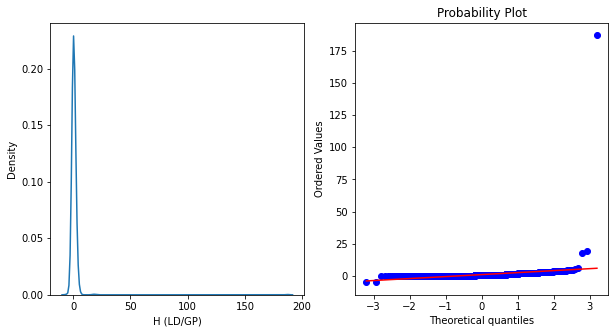

In [27]:
normality(df,columns_name[9]) #robust

<b>debtToEquity </b>

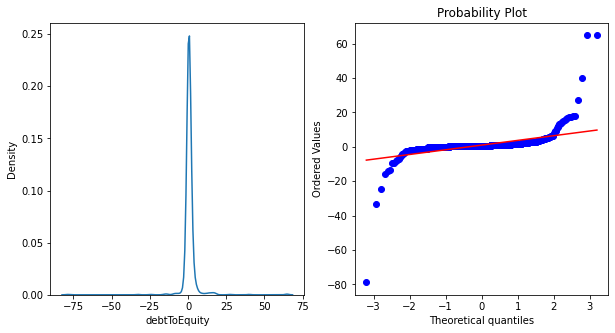

In [28]:
normality(df,columns_name[10]) #robust

<b>Net Issuance</b>

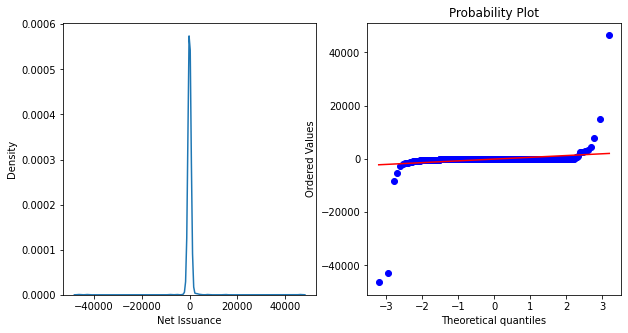

In [29]:
normality(df,columns_name[11]) #robust

<b>Interest - income'</b>

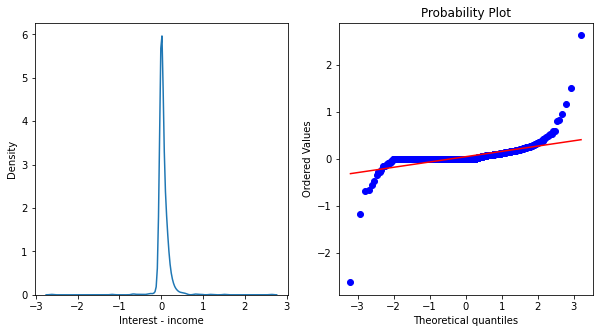

In [30]:
normality(df,columns_name[12]) #robust

<h1> Based off the Q plots and normal distribution I will choose Robust Scaling for all the features </h1>

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbol             1005 non-null   object 
 1   GPM                1005 non-null   float64
 2   A (SGA)            1005 non-null   float64
 3   B (RD)             1005 non-null   float64
 4   C (PPE)            1005 non-null   float64
 5   D (DEPR)           1005 non-null   float64
 6   E (CAPEX)          1005 non-null   float64
 7   F (NR)             1005 non-null   float64
 8   currentRatio       1005 non-null   float64
 9   G (ROA)            1005 non-null   float64
 10  H (LD/GP)          1005 non-null   float64
 11  debtToEquity       1005 non-null   float64
 12  Net Issuance       1005 non-null   float64
 13  Interest - income  1005 non-null   float64
 14  Buy =1             1005 non-null   int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 117.9+ KB


In [32]:
# df = df.drop(columns='symbol')


In [33]:
# # let's explore the datafeatures correlation
# # correlation 
# corr = df.corr()
# top_corr_feat = corr.index
# plt.figure(figsize=(16, 10))
# sns.heatmap(df[top_corr_feat].corr(), annot=True, fmt='.0%')

In [34]:
robust_scaler = RobustScaler() # instantiate
# robust_scaler.fit(X.iloc[:, 1: ]) #fit scaler to feature
# X_rescaled = robust_scaler.transform(X.iloc[:, 1: ]) #Scale


In [35]:
# one hot encode the lender
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
final_ohe = encoder.fit_transform(df.symbol.values.reshape(-1,1)).toarray()
final_dfOneHot = pd.DataFrame(final_ohe, columns=['Stock_'+str(encoder.categories_[0][i]) for i in range(len(encoder.categories_[0]))])


In [36]:
final_dfOneHot

,Stock_AAPL,Stock_ALL,Stock_AMZN,Stock_AXP,Stock_BTI,Stock_BUD,Stock_CNI,Stock_CSCO,Stock_CSX,Stock_DFS,...,Stock_PEP,Stock_PG,Stock_PGR,Stock_PM,Stock_PZZA,Stock_SBUX,Stock_TAP,Stock_WFC,Stock_WMT,Stock_YUM
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
# concat the dataframe of our stock holders (lenders)
final_df = pd.concat([df, final_dfOneHot], axis=1)

In [38]:
# lets drop symbol from our DF
final_df = final_df.drop(columns='symbol')

In [39]:
final_df

,GPM,A (SGA),B (RD),C (PPE),D (DEPR),E (CAPEX),F (NR),currentRatio,G (ROA),H (LD/GP),...,Stock_PEP,Stock_PG,Stock_PGR,Stock_PM,Stock_PZZA,Stock_SBUX,Stock_TAP,Stock_WFC,Stock_WMT,Stock_YUM
0,0.417794,0.143768,0.143382,0.258054,0.073831,-0.117079,0.544001,1.074553,0.269742,0.713876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.382332,0.189756,0.178665,0.350299,0.105339,-0.127310,0.652227,1.363604,0.177256,0.940080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.378178,0.185432,0.164820,0.379889,0.127521,-0.189934,0.828942,1.540126,0.163230,0.933074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.383437,0.164033,0.139789,0.405581,0.107061,-0.223631,0.823017,1.123843,0.162775,0.920423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.384699,0.173055,0.131325,0.383088,0.115177,-0.264627,0.737792,1.276063,0.128826,1.102295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0.477492,0.731627,0.000000,0.914759,0.111446,0.117886,0.341463,0.542878,0.091111,0.692470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1001,0.473425,0.743895,0.000000,0.826980,0.105420,-1.539952,0.423729,0.551677,0.094120,0.462180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1002,0.460624,0.655842,0.000000,0.704968,0.098251,-0.912281,0.481659,0.480263,0.151121,0.665279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1003,0.437411,0.722462,0.000000,0.683315,0.104212,-1.056180,0.361798,0.303047,0.112345,0.645518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
# features of X and create target y
X = final_df.drop(columns=['Buy =1'])
y = final_df['Buy =1']

In [41]:
X.shape

(1005, 47)

<h2>Baseline KNN model</h2>

In [84]:
# lets produce final model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_validate(knn_model, X_train, y_train, cv = 5)
cv_score_mean = np.mean(cv_scores['test_score'])
cv_score_mean

0.8790881458966565

5-fold cross validate a simple KNN classifier taking into account 5 of the closest neighbor, and compute its mean cv-score

In [85]:
# scaling is moved up to robust scaler and score improves
robust_scaler.fit(X_train)
rescaled_X_train = robust_scaler.transform(X_train)

cv_scores = cross_validate(knn_model, rescaled_X_train, y_train, cv = 5)
cv_score_mean = np.mean(cv_scores['test_score'])
cv_score_mean

0.8933434650455927

<h3>Assuming no grid search or hyperparameters </h3>

In [86]:
knn_model.fit(rescaled_X_train, y_train) #fit our model
# # we found our model above, and need to retrain our rescaled_X with our model (resclaed X and regular y_train)
rescaled_X_test = robust_scaler.transform(X_test)

# #score the model on the Testing Data
knn_model.score(rescaled_X_test, y_test)

0.8509933774834437

In [87]:
r2_test = knn_model.score(rescaled_X_test, y_test)

In [88]:
print(r2_test)

0.8509933774834437


In [89]:
y_pred = knn_model.predict(rescaled_X_test)

In [90]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))

[[ 72  22]
 [ 23 185]]
0.8509933774834437
[0.76595745 0.88942308]
[0.75789474 0.89371981]


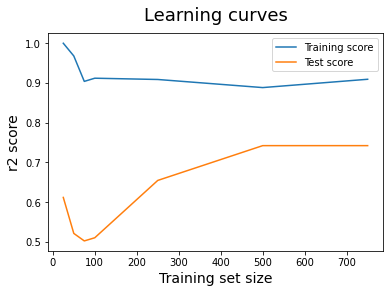

In [91]:
# Take the mean of cross-validated train scores and validation scores
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn_model, X=X, y=y, train_sizes=train_sizes, cv=5)
    
    
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()